In [4]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [33]:
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

In [34]:
data = yf.download('GLD',start,end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,168.860001,169.009995,168.000000,168.330002,168.330002,9014400
2022-01-04,168.899994,169.720001,168.729996,169.570007,169.570007,6965600
2022-01-05,170.619995,170.929993,168.899994,169.059998,169.059998,8715600
2022-01-06,167.160004,167.750000,166.860001,166.990005,166.990005,10902700
2022-01-07,167.369995,168.009995,166.860001,167.750000,167.750000,8191900
...,...,...,...,...,...,...
2023-11-30,188.889999,189.240005,188.279999,188.750000,188.750000,7558100
2023-12-01,188.809998,192.399994,188.690002,192.009995,192.009995,16724900
2023-12-04,189.600006,190.380005,187.259995,187.860001,187.860001,18460500


In [35]:
ma_1 = 30
ma_2 = 100

In [36]:
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window = ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window = ma_2).mean()

In [37]:
data = data.iloc[ma_2:]

In [38]:
plt.style.use('dark_background')

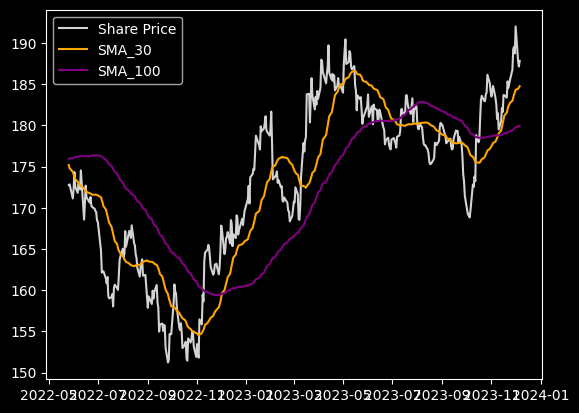

<Figure size 1000x2000 with 0 Axes>

In [39]:
plt.plot(data['Adj Close'], label = 'Share Price', color='lightgray')
plt.plot(data[f'SMA_{ma_1}'], label = f'SMA_{ma_1}', color= 'orange')
plt.plot(data[f'SMA_{ma_2}'], label = f'SMA_{ma_2}', color= 'purple')
plt.legend(loc = 'upper left')
plt.figure(figsize=(10, 20 ))
plt.show()

In [40]:
buy_signals = [float('nan')] * len(data)
sell_signals = [float('nan')] * len(data)
trigger = 0

In [41]:
# Assuming data, ma_1, ma_2, and trigger are defined before this code snippet

buy_signals = [float('nan')] * len(data)
sell_signals = [float('nan')] * len(data)

for i in range(len(data)):
    if data[f'SMA_{ma_1}'].iloc[i] > data[f'SMA_{ma_2}'].iloc[i] and trigger != 1:
        buy_signals[i] = data['Adj Close'].iloc[i]
        sell_signals[i] = float('nan')
        trigger = 1
    elif data[f'SMA_{ma_1}'].iloc[i] < data[f'SMA_{ma_2}'].iloc[i] and trigger != -1:
        buy_signals[i] = float('nan')
        sell_signals[i] = data['Adj Close'].iloc[i]
        trigger = -1
    else:
        buy_signals[i] = float('nan')
        sell_signals[i] = float('nan')

# Add signals to the DataFrame
data['Buy_Signals'] = buy_signals
data['Sell_Signals'] = sell_signals


<ipython-input-41-83e518d1fe29>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signals'] = buy_signals
<ipython-input-41-83e518d1fe29>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signals'] = sell_signals


In [42]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-26  172.130005  172.929993  171.759995  172.759995  172.759995   
2022-05-27  173.490005  173.520004  172.639999  172.850006  172.850006   
2022-05-31  172.710007  173.070007  171.080002  171.139999  171.139999   
2022-06-01  172.210007  172.529999  171.389999  172.229996  172.229996   
2022-06-02  173.660004  174.449997  173.490005  174.350006  174.350006   
...                ...         ...         ...         ...         ...   
2023-11-30  188.889999  189.240005  188.279999  188.750000  188.750000   
2023-12-01  188.809998  192.399994  188.690002  192.009995  192.009995   
2023-12-04  189.600006  190.380005  187.259995  187.860001  187.860001   
2023-12-05  187.550003  187.880005  186.300003  187.149994  187.149994   
2023-12-06  188.320007  188.460007  187.500000  187.839996  187.839996   

              Volume      SMA_30   SM

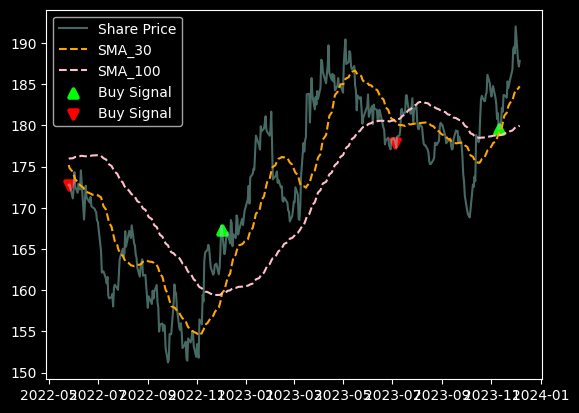

<Figure size 1000x2000 with 0 Axes>

In [43]:
plt.plot(data['Adj Close'], label = 'Share Price', alpha= 0.5)
plt.plot(data[f'SMA_{ma_1}'], label = f'SMA_{ma_1}', color= 'orange', linestyle = '--')
plt.plot(data[f'SMA_{ma_2}'], label = f'SMA_{ma_2}', color= 'pink', linestyle = '--')
plt.scatter(data.index, data['Buy_Signals'], label ='Buy Signal', marker = "^", color ='#00ff00',lw = 3)
plt.scatter(data.index, data['Sell_Signals'], label ='Buy Signal', marker = "v", color ='#ff0000',lw = 3)
plt.legend(loc = 'upper left')
plt.figure(figsize=(10, 20 ))
plt.show()